<a href="https://colab.research.google.com/github/Keerti2005/BHARAT_INTERN/blob/main/Movie_Recommedation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
# import matplotlib.pyplot as plt
# import seaborn as sns
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [2]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296.0,5.0,1.147880e+09
1,1,306.0,3.5,1.147869e+09
2,1,307.0,5.0,1.147869e+09
3,1,665.0,5.0,1.147879e+09
4,1,899.0,3.5,1.147869e+09


In [3]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,638,639,640,641,642,643,644,645,646,647
movieId,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,NaN,3.5,4.0,3.0,4.0,NaN,NaN,4.0,NaN,3.5,...,4.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.5,3.5
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.5
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,638,639,640,641,642,643,644,645,646,647
movieId,,,,,,,,,,,,,,,,,,,,,
NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,3.5,4.0,3.0,4.0,0.0,0.0,4.0,0.0,3.5,...,4.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.5,3.5
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

In [13]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

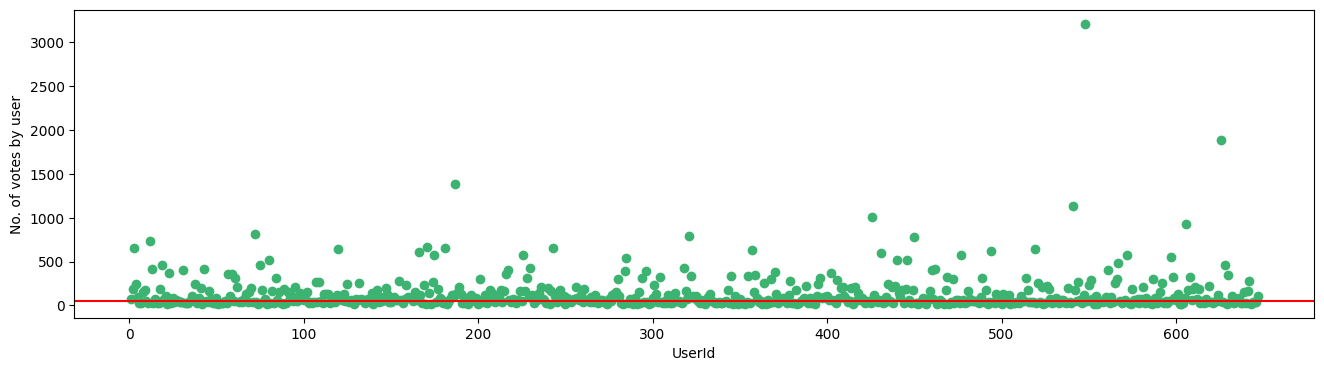

In [15]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 1, figsize=(16, 4))
plt.scatter(no_movies_voted.index, no_movies_voted, color='mediumseagreen')
plt.axhline(y=50, color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [17]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,1,2,3,4,5,8,9,10,12,13,...,626,628,630,632,634,636,639,641,642,647
movieId,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,3.5,4.0,3.0,4.0,4.0,0.0,3.5,4.0,4.0,...,4.5,4.5,3.5,0.0,2.0,4.0,0.0,0.0,0.0,3.5
2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
6.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177593.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187541.0,0.0,0.0,3.5,3.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [19]:
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [20]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [21]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [22]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]
    if len(movie_list):
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [23]:
get_movie_recommendation('Iron Man')

,Title,Distance
1,V for Vendetta (2006),0.422820
2,Iron Man 3 (2013),0.422795
3,Inception (2010),0.422378
4,Batman Begins (2005),0.419573
5,Captain America: The Winter Soldier (2014),0.417213
6,WALL·E (2008),0.397691
7,"Dark Knight Rises, The (2012)",0.397562
8,Iron Man 2 (2010),0.361448
9,"Avengers, The (2012)",0.353436
10,"Dark Knight, The (2008)",0.350800
